In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [93]:
pd.DataFrame({'Column Names':df.columns.values},index=range(1,22))


,Column Names
1,customerID
2,gender
3,SeniorCitizen
4,Partner
5,Dependents
6,tenure
7,PhoneService
8,MultipleLines
9,InternetService
10,OnlineSecurity


In [94]:
df.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [95]:
df.isnull().sum().sum()


0

In [96]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [97]:
pd.DataFrame({'Column Names':df.columns.values},index=range(1,22))


,Column Names
1,customerID
2,gender
3,SeniorCitizen
4,Partner
5,Dependents
6,tenure
7,PhoneService
8,MultipleLines
9,InternetService
10,OnlineSecurity


In [98]:
#printing the unique values of all the columns
for i in df: print ("No. of values=",df[i].nunique(),'\n',df[i].value_counts(),'\n','-'*100)

No. of values= 7043 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 Male      3555
Female    3488
Name: gender, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 No     3641
Yes    3402
Name: Partner, dtype: int64 
 ----------------------------------------------------------------------------------------------------
No. of values= 2 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 
 -------------------------------------------------

## **Exploratory Data Analysis & Data Visualization**

In [99]:
categorical_feats, numerical_feats = [], []

for i in df: 
    if df[i].dtypes=='object': categorical_feats.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'): numerical_feats.append(i)

print('Total Number of Features →', df.shape[1])
print('Number of Categorical Features →', len(categorical_feats))
print('Number of Numerical Features →', len(numerical_feats))

Total Number of Features → 21
Number of Categorical Features → 18
Number of Numerical Features → 3


In [100]:
df.groupby(['gender'])['Churn'].size()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

In [101]:
df_churned = df["Churn"][df["Churn"] == 'Yes']
print ("Churn Percentage =", str(round((df_churned.shape[0] / df["Churn"].shape[0]) * 100,2))+'%' )

Churn Percentage = 26.54%


In [102]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

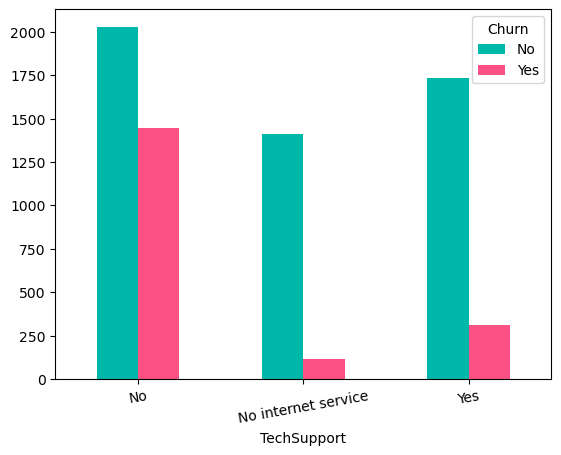

In [103]:
df.groupby(["TechSupport", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observations: 
Majority of the people leaving have not signed up for tech support.

### Assumption: 
People might be departing due to the lack of suitable customer care.

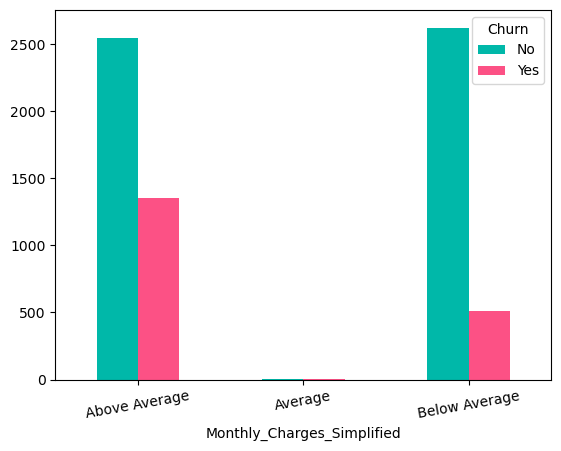

In [104]:
# determining whether excessive monthly fees are the cause of the individuals departing
df_new = df.copy() # We copy and create a new df so we dont cause any changes in the original
Monthly_Charges_Simplified = [] # Create a new array to be able determine monthly charges more easily
for i in df_new['MonthlyCharges']:
    if i > 65: Monthly_Charges_Simplified.append('Above Average') 
    elif i == 65: Monthly_Charges_Simplified.append('Average')
    elif i < 65: Monthly_Charges_Simplified.append('Below Average')
df_new['Monthly_Charges_Simplified'] = Monthly_Charges_Simplified

# plot
df_new.groupby(['Monthly_Charges_Simplified','Churn']).size().unstack().plot(kind='bar',stacked=False, color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation :
Majority of the people leaving are paying more then $65

### Assumption :
The majority of visitors might be departing because they found a better alternative to their current telecom provider that charges less than $65

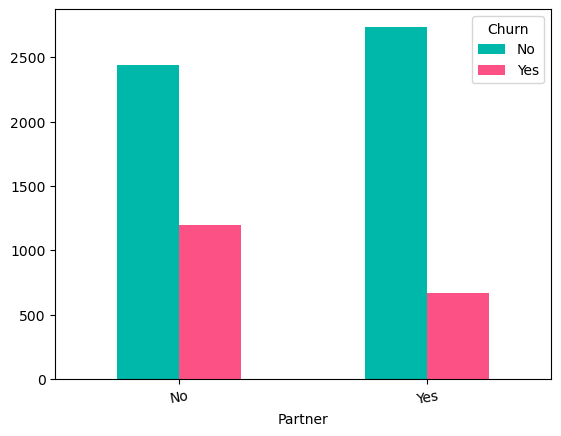

In [105]:
df.groupby(["Partner", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation : 
Customers with no partners are more likely to leave their current service.

### Assumption : 
This is likely due to the fact that people with partners will have to take each others choices into consideration and even if one partner is unhappy with the service they might continue with it with their partner is happy with it. Also in scenarios where one partner might be leaving the country due to some reason for long term if they were alone they would cancel the service however if their partner continues in the same country they will keep the service active for them

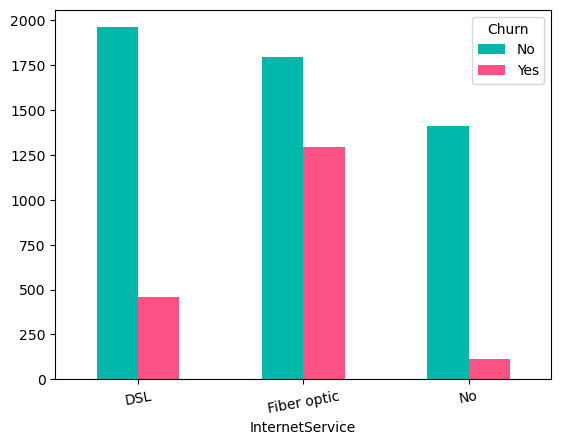

In [106]:
df.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation : 
Customers with fibre optic have a much higher churn rate

### Assumption : 
This might be because the fibre optic connection promised might not be up to standards or faulty

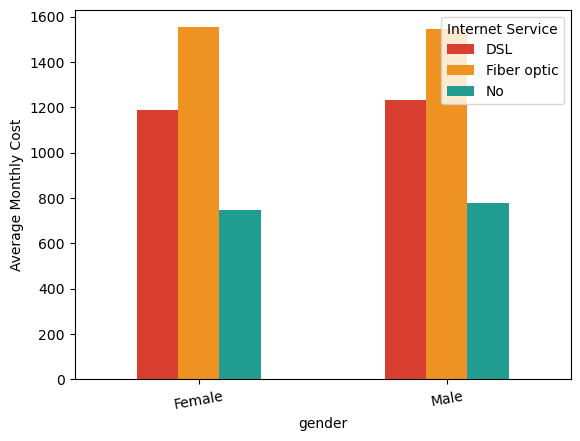

In [107]:
df.groupby(['gender', 'InternetService'])['MonthlyCharges'].size().unstack().plot(kind ='bar', stacked=False,color=(['#D83F31','#EE9322','#219C90']))
plt.ylabel('Average Monthly Cost')
plt.legend(title='Internet Service', loc='upper right')
plt.xticks(rotation=10)
plt.show()

## Observation
There is no bias according to gender

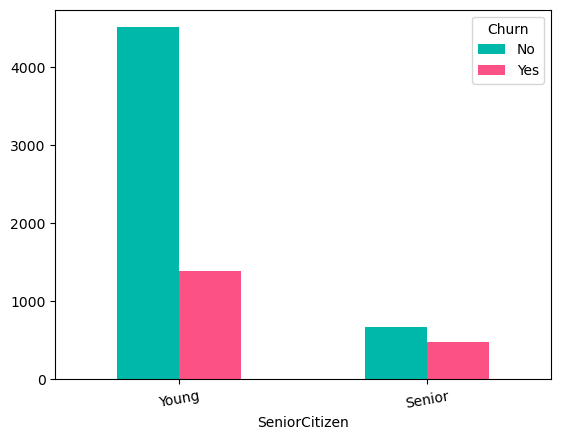

In [108]:
df.groupby(['SeniorCitizen', 'Churn']).size().unstack().plot(kind ='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks([0, 1], ['Young', 'Senior'], rotation=0)
plt.xticks(rotation=10)
plt.show()

## Observation : 
Seems to be a overall higher churn rate in senior citizens

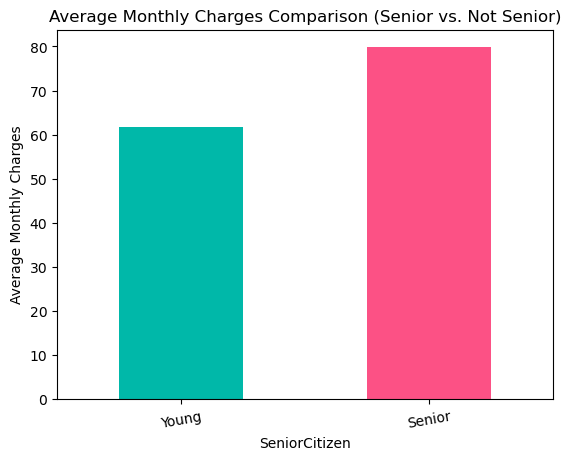

In [109]:
df.groupby('SeniorCitizen')['MonthlyCharges'].mean().plot(kind='bar', color=['#00B8A9', '#FC5185'])
plt.title('Average Monthly Charges Comparison (Senior vs. Not Senior)')
plt.ylabel('Average Monthly Charges')
plt.xticks([0, 1], ['Young', 'Senior'], rotation=10)
plt.show()


## Observation : 
Average charge for senior citizens is higher

### Assumption : 
This might be either because they are longer tenure customers with much more expensive plans that they have been using for long time.

# Feature Engineering

In [110]:
#Tenure groups, Monthly charges and Total charges will be divided into groups

#Tenure (the number of months the customer has stayed with the company)
Tenure = []
for t in df.tenure: 
    if t <= 12: Tenure.append('Bronze Customer')
    elif t <= 36: Tenure.append('Silver Customer')
    elif t <= 55: Tenure.append('Gold Customer')        
    elif t > 55: Tenure.append('Platinum Customer')      
        
#MontlyCharges 
Monthly = []
for m in df.MonthlyCharges: 
    if m <= 36: Monthly.append('Telecom Package 1')
    elif m <= 75: Monthly.append('Telecom Package 2')
    elif m <= 95: Monthly.append('Telecom Package 3')        
    elif m > 95: Monthly.append('Telecom Package 4')
        
#Total Charges {removing the blank values and replacing it with the 25 Quartile value}
TotalCharge = []
for values in df.TotalCharges:
    if values != ' ': TotalCharge.append(values)
    else: TotalCharge.append('1609')
df.TotalCharges = TotalCharge
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))

TotalC = []
for c in df.TotalCharges: 
    if c <= 1700: TotalC.append('Annual Bronze') 
    elif c <= 3500: TotalC.append('Annual Silver')
    elif c <= 5000: TotalC.append('Annual Gold')        
    elif c > 5000: TotalC.append('Annual Platinum')

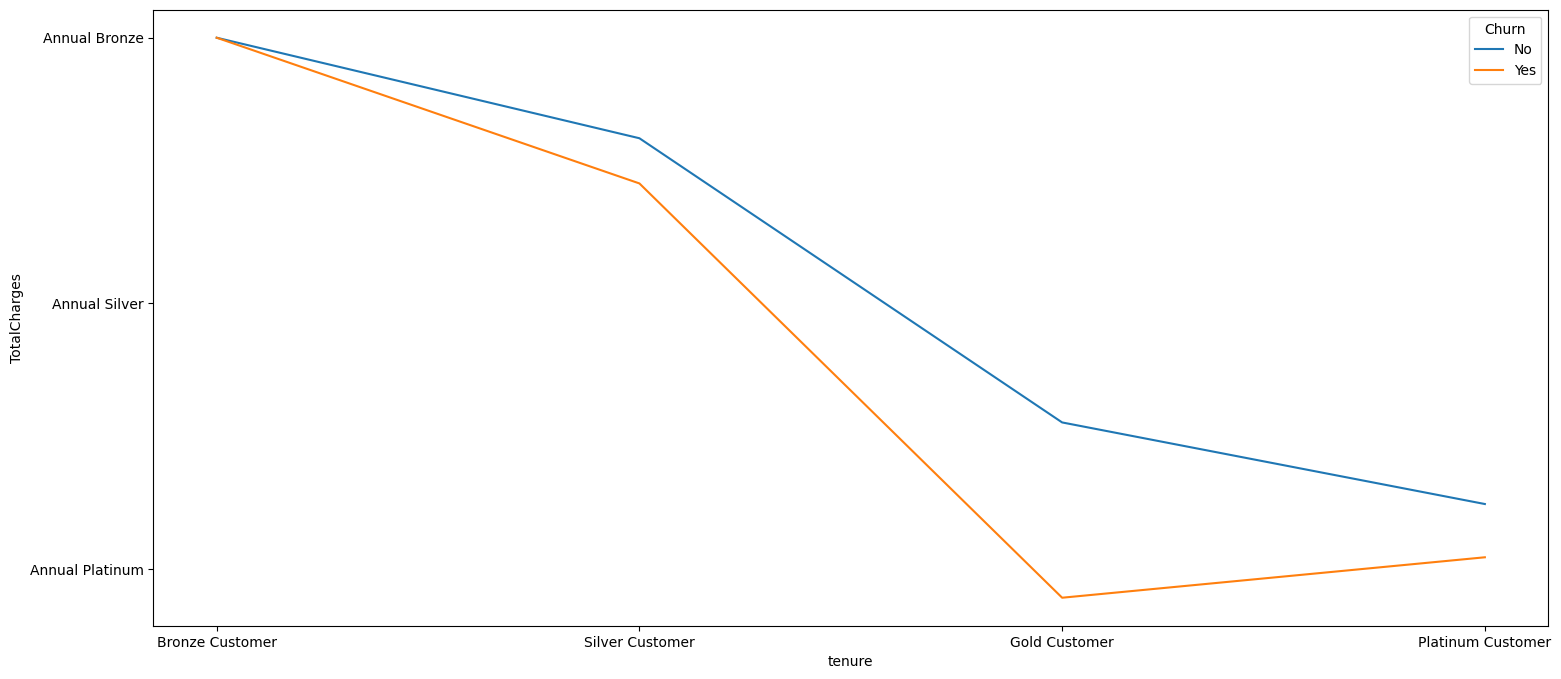

In [111]:
df.tenure = Tenure
df.MonthlyCharges = Monthly
df.TotalCharges = TotalC
plt.figure(figsize=(18,8))
sns.lineplot(x='tenure',y='TotalCharges',hue='Churn',data=df, ci=None)
plt.show()

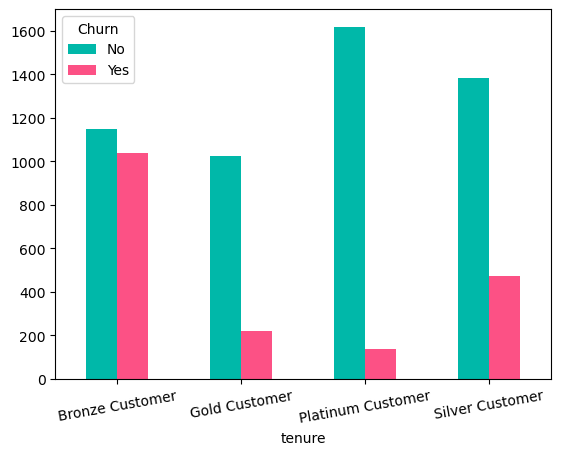

In [112]:
df.groupby(["tenure", "Churn"]).size().unstack().plot(kind='bar', stacked=False,color=(['#00B8A9','#FC5185']))
plt.xticks(rotation=10)
plt.show()

## Observation
* We can see that platinum customers (customers with more than 55 months of service) have the lowest churn rate.
* Ranking (lowest to highest churn rate):
    * Platinum Customer
    * Gold Customer
    * Silver Customer
    * Bronze Customer

### Assumption 
* This might be because the telecom service provides better offers to long term customers and we can see this by the churn rates

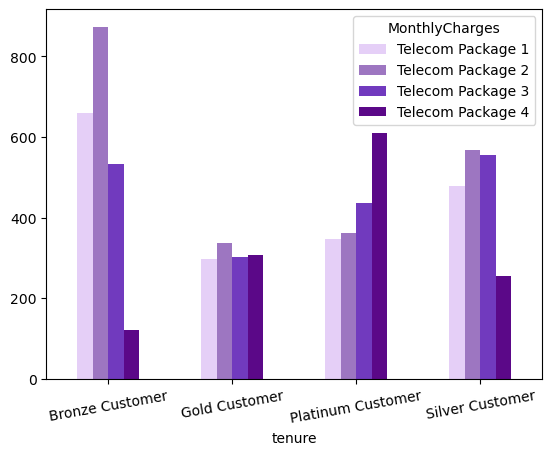

In [113]:
df.groupby(["tenure", "MonthlyCharges"]).size().unstack().plot(kind='bar', stacked=False, color=(['#E5CFF7','#9D76C1',
                                                                                                 '#713ABE','#5B0888']))
plt.xticks(rotation=10)
plt.show()

## Observation: 
* Bronze and Silver tenured (0-36 months) customers usually pay between 0-1500 USD.
* Gold Customers usually pay less than Platinum but have a higher churn rate then platinum.

### Assumption: 
* Better pricing for Bronze and silver customers may reduce their churn rates. 
* Platinum customers are more likely to stick with their current service as they are already comfortable with their service and have been using it for a long time. Therefore they would be a little more comfortable with paying a little more then gold customers since they like their service.